### K-NN算法理解
#### 1.介绍
k近邻算法基于分类和回归的方法，工作原理为：已知一个样本数据集合，称之为训练样本集，且每个数据都存在有标签，即每个数据所属分类我们是知道的。在此基础上训练，再输入没有标签的新数据，将新的数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本最相似（最近邻）的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。
　
举一个具体的例子，使用k-近邻算法分类一部影片是爱情片还是动作片。
> 表中每部电影的打斗次数，接吻次数及电影的类型

| 电影名称     | 打斗次数| 接吻次数 | 类型|
|--------|---------|---------|:-------:|
| 电影1| 1|101| 爱情片      |
| 电影2| 5| 89 |爱情片      |
| 电影3| 108| 5 | 动作片    |
| 电影4| 115| 8 | 动作片    |
表中就是我们已有的数据集合，也就是训练样本集。这个数据集有两个特征，即打斗镜头数和接吻镜头数。除此之外，我们也知道每个电影的所属类型，即分类标签。用肉眼粗略地观察，接吻镜头多的，是爱情片。打斗镜头多的，是动作片。*现在给一个新的电影，给出接吻次数和打斗次数，我们判断属于哪一类的电影*。k-近邻算法是靠已有的数据来度量距离判断未知的数据。
#### 2.距离度量
我们已经知道k-近邻算法根据特征比较，然后提取样本集中特征最相似数据(最邻近)的分类标签。那么，如何进行比较呢？比如，我们还是以表格为例，怎么判断红色圆点标记的电影所属的类别呢？


**散点图解释**
1. `scatter()` 散点图的绘制 其中输入可以是单点坐标也可以是一个list
2. `color=' '` 设置点的颜色使用
3. `annotate()` 是在图上添加描述
4. `xlabel()` 设置横轴名称，同理纵轴使用 `ylabel()` 设置
5. `xlim()` 设置横轴数值范围， 同理纵轴使用 `ylim()` 设置

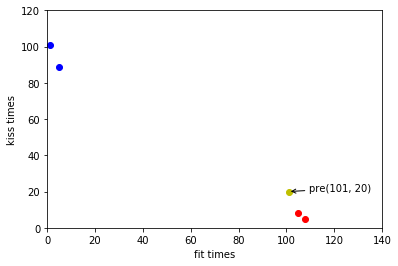

In [5]:
import matplotlib.pyplot as plt
#爱情片
x_1 = [1, 5, ]
y_1 = [101, 89]
#动作片
x_2 = [108, 105]
y_2 = [5, 8]
#待预测电影
x_pre = 101
y_pre = 20
#绘制
plt.scatter(x_1, y_1, color='b')
plt.scatter(x_2, y_2, color='r')
plt.scatter(x_pre, y_pre, color='y')
#给x_pre,y_pre添加描述
plt.annotate('pre(101, 20)' ,xy=(x_pre,y_pre),xycoords='data',xytext=(+20,-0),
            textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle='->'))
#设置x,y轴标签
plt.xlabel('fit times')
plt.ylabel('kiss times')
#设置横轴坐标值范围
plt.xlim((0, 140))
plt.ylim((0, 120))
plt.show()

从散点图可以大致的推断出，这个pre点是属于动作片的，因为距离红色点更近。那么K-近邻算法是怎么判断这个距离的？没错，就是使用距离度量。因为电影的判断标准是*打斗次数*和*接吻次数*2个特征，也就是2维实数向量空间，可以使用两点计算公式：
$$|AB| = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$
- **MarkDown公式编辑解释**
    1. `$公式$` 表示行内公式，而 `$$公式$$` 表示在新的一行写公式
    2. 开方使用 `\sqrt{x}`,例：$\sqrt{x}$
    3. 上下标，`x^2`,`x_2`为上下标，比如 $x^2+x_2$
------
通过计算，可以得到如下结果：
- (101,20)->动作片(108,5)的距离约为16.55
- (101,20)->动作片(115,8)的距离约为18.44
- (101,20)->爱情片(5,89)的距离约为118.22
- (101,20)->爱情片(1,101)的距离约为128.69

通过计算可知，红色圆点标记的电影到动作片 (108,5)的距离最近，为16.55。如果算法直接根据这个结果，判断该红色圆点标记的电影为动作片，这个算法就是最近邻算法，而非k-近邻算法。那么k-近邻算法是什么呢？k-近邻算法步骤如下：
1. 计算已知类别数据集中的点与当前点之间的距离
2. 按照距离递增排列
3. 选取与当前点距离最小的k个点
4. 确定前k个点所在类别的出现频率
5. 返回前k个点所出现频率最高的类别作为当前点的预测分类

比如，现在我这个k值取3，那么在电影例子中，按距离依次排序的三个点分别是动作片(108,5)、动作片(115,8)、爱情片(5,89)。在这三个点中，动作片出现的频率为三分之二，爱情片出现的频率为三分之一，所以该红色圆点标记的电影为动作片。这个判别过程就是k-近邻算法。

#### 3.Python代码实现
我们已经知道了k-近邻算法的原理，那么接下来就是使用Python实现该算法，依然以电影分类为例。

(1) 数据集的准备

对表格中的数据，可使用numpy直接创建，代码如下：

In [2]:
#-*- coding: UTF-8 -*-
import numpy as np
import operator
"""
函数说明：根据表格内容创建数据集

parameters:
    无
return:
    group - 数据集
    labels- 分类标签
"""
def createDataSet():
    #四组二维特征
    group = np.array([
        [1, 101],
        [5, 89],
        [108, 5],
        [115, 8]
    ])
    #四组特征的标签
    labels = ['爱情片', '爱情片', '动作片', '动作片']
    return group, labels
# if __name__ == '__main__':
#     #创建数据集
#     group, labels = createDataSet()
#     #打印数据集
#     print(group, "\n", labels)

(2) K-近邻算法

根据两点距离公式，计算距离，选择距离最小的前k个点，并返回分类结果。
1. `shape[0]` 返回dataSet的行数，比如 `createDataSet()` 创建的group是一个[4x1]的矩阵,则 `group.shape[0]` 的值为4
2. `np.tile()` 是一种元素复制方法，比如`a = [1,2]`,则 `np.tile(a, 2)` 结果为`a = [1,2,1,2]`,更高级的 `np.tile(a, [4,1])`结果变成 `4x1` 的矩阵`[[1,2],[1,2],[1,2],[1,2]]`
3. `sum()` 函数为按行 `sum(1)` 和按列 `sum(0)`
4. `argsort()` 为将元素按照从小到达排序之后返回其索引值

In [3]:
def k_nn(inX, dataSet, labels, k):
    #shape[0]获取数据集的行数
    dataSetSize = dataSet.shape[0]
    #
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    #sum()所有元素相加，sum(0)按列相加，sum(1)按行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方，计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定义一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

(3) 进行实现

In [4]:
if __name__ == '__main__':
    import time
    start = time.time()
    #创建数据集
    group, labels = createDataSet()
    print(group, "\n", labels)
    #测试集
    test = [1, 80]
    #K-NN分类器
    test_class = k_nn(test, group, labels, 3)
    #打印输出结果
    print(test_class)
    print("run time: %s s" %(time.time()-start))

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]] 
 ['爱情片', '爱情片', '动作片', '动作片']
爱情片
run time: 0.0013785362243652344 s


### K-NN算法实现


#### 1.多维距离和算法流程

由1.3的代码实现可以得出，这种最近邻的度量标准是work的，但是电影的列子是2维的，如果特征更多上升到高维呢？那就需要使用欧式距离（欧几里得度量）。
        $$d(\mathbf{p},\mathbf{q})=d(\mathbf{q},\mathbf{p})=\sqrt{(q_1-p-1)^2+(q_2-p-2)^2+(q_3-p-3)^2+...+(q_n-p-n)^2}=\sqrt{\sum_{m=0}^n {(q_i-p_i)^2} }$$
分类器并不会得到百分百正确的结果，我们可以使用多种方法检测分类器的正确率。此外分类器的性能也会受到多种因素的影响，如分类器设置和数据集等。不同的算法在不同数据集上的表现可能完全不同。为了测试分类器的效果，我们可以使用已知答案的数据，当然答案不能告诉分类器，检验分类器给出的结果是否符合预期结果。通过大量的测试数据，我们可以得到分类器的错误率-分类器给出错误结果的次数除以测试执行的总数。错误率是常用的评估方法，主要用于评估分类器在某个数据集上的执行效果。
K-近邻算法的主要流程为：
- 1.收集数据：可以使用爬虫或者现有的数据。一遍数据存放在txt文本中，按照一定的格式进行存储，便于解析和处理；
- 2.数据准备：使用Python的列表和字典预处理数据；
- 3.分析数据：数据分析一般使用matplotlib可视化；
- 4.测试算法：计算错误率
- 5.使用算法：错误率在一个范围内之内，运行K-NN进行算法分类
#### 2.问题描述和数据准备
- 问题描述
海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：
    1. 不喜欢的人
    2. 魅力一般的人
    3. 极具魅力的人
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件K_NNData.txt中，共1000行。
海伦收集的样本数据主要包含以下3种特征：
    1. 每年获得的飞行常客里程数
    2. 玩视频游戏所消耗的时间百分比
    3. 每周消耗的冰激凌公升数
------
**K_NNData.txt中文件格式**
![图片](/home/yu/Templates/Numpy_Pandas_Matplotlib/jupyter_notebook/Data格式.png)
- 数据解析
在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式。分类器接收的数据是什么格式的？要将数据分类两部分，即特征矩阵和对应的分类标签向量。创建名为file2matrix的函数，以此来处理输入格式问题。编写代码如下：

In [10]:
#-*- coding: UTF-8 -*-
import numpy as np
"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
"""
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    array0Lines = fr.readlines()
    #得到文件行数
    numberOfLines = len(array0Lines)
    #定义返回矩阵，解析完成的数据：numberOfLines行，3列
    returnMat = np.zeros((numberOfLines, 3))
    #返回分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in array0Lines:
        #s.strip(rm)，当rm空时,默认删除头尾空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index, :] = listFromLine[0:3]
       #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector 
filename = "K_NNData.txt"
datingDataMat, datingLabels = file2matrix(filename)
print(datingDataMat.shape)
print(len(datingLabels))
print(datingDataMat,"\n",datingLabels)

(1000, 3)
1000
[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]] 
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1

可以看到，我们已经顺利导入数据，并对数据进行解析，格式化为分类器需要的数据格式。接着我们需要了解数据的真正含义。可以通过友好、直观的图形化的方式观察数据。


#### 数据可视化

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
"""
函数说明:可视化数据

Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2017-03-24
"""
